In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('tweet_data.csv')

In [4]:
df.head()

,tweetID,crDate,edInput,editor,engages,isApproved,isEdNeed,isRT,likes,photoUrl,retweets,rtUsID,text,topicName,usFlwrs,usID,usName,videoUrl
0,1070867471245164544,2018-12-07 02:27:55,-1,-1,98,False,True,False,64,https://pbs.twimg.com/media/Dtx8SiIWkAImVsb.jpg,34,-1,The immediate impulse for an alliance of the E...,Business,23464532,5988062,The Economist,NaN
1,1070868017888837633,2018-12-07 02:30:05,-1,-1,13,False,True,False,10,https://pbs.twimg.com/media/Dtx8yTyW4AEciqP.jpg,3,-1,America's economy is flashing some warning sig...,Business,1732809,16184358,CNN Business,NaN
2,1070868012864028673,2018-12-07 02:30:04,-1,-1,12,False,True,False,8,NaN,4,-1,Lyft files for what is expected to be one of t...,Business,2253989,25053299,FORTUNE,NaN
3,1070867995239555075,2018-12-07 02:30:00,-1,-1,5,False,True,False,4,NaN,1,-1,"Exporters still waiting to get Rs 6,000 crore ...",Business,1704056,43855487,Business Standard,NaN
4,1070867995205885952,2018-12-07 02:30:00,-1,-1,5,False,True,False,2,NaN,3,-1,Ride-hailing firm Lyft races to leave Uber beh...,Business,1997662,15110357,Reuters Business,https://video.twimg.com/amplify_video/10708116...


In [5]:
df.describe()

,tweetID,edInput,editor,engages,likes,retweets,rtUsID,usFlwrs,usID
count,7.859160e+05,785916.000000,785916.000000,7.859160e+05,7.859160e+05,7.859160e+05,7.859160e+05,7.859160e+05,7.859160e+05
mean,1.115213e+18,0.206035,2311.963123,1.403637e+03,1.085909e+03,3.177282e+02,4.365098e+16,4.472701e+06,1.085276e+17
std,2.925292e+16,1.439867,2495.158883,1.665960e+04,1.293993e+04,4.053267e+03,1.894384e+17,9.149778e+06,3.010486e+17
min,5.354500e+04,-1.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,1.200000e+01
25%,1.095791e+18,-1.000000,-1.000000,2.300000e+01,1.600000e+01,6.000000e+00,-1.000000e+00,1.426280e+05,1.551377e+07
50%,1.116465e+18,-1.000000,-1.000000,6.400000e+01,4.500000e+01,1.800000e+01,-1.000000e+00,9.668265e+05,3.618422e+07
75%,1.137676e+18,1.000000,5003.000000,2.500000e+02,1.840000e+02,6.500000e+01,-1.000000e+00,3.603135e+06,9.545908e+08
max,1.154179e+18,4.000000,5101.000000,4.152927e+06,3.206434e+06,1.335638e+06,1.108957e+18,1.057384e+08,1.153467e+18


In [6]:
# sample text
df.iloc[0]['text']

"The immediate impulse for an alliance of the EU's northern states is Brexit https://t.co/nlhUD36hay https://t.co/shwMWpjjuK"

In [7]:
(df['topicName']=='Business').sum()

164602

In [8]:
df.shape

(785916, 18)

In [9]:
df.columns

Index(['tweetID', 'crDate', 'edInput', 'editor', 'engages', 'isApproved',
       'isEdNeed', 'isRT', 'likes', 'photoUrl', 'retweets', 'rtUsID', 'text',
       'topicName', 'usFlwrs', 'usID', 'usName', 'videoUrl'],
      dtype='object')

In [10]:
df.isnull().sum()

tweetID            0
crDate             0
edInput            0
editor             0
engages            0
isApproved         0
isEdNeed           0
isRT               0
likes              0
photoUrl      508020
retweets           0
rtUsID             0
text               0
topicName          0
usFlwrs            0
usID               0
usName             0
videoUrl      645425
dtype: int64

In [11]:
df.dtypes

tweetID        int64
crDate        object
edInput        int64
editor         int64
engages        int64
isApproved      bool
isEdNeed        bool
isRT            bool
likes          int64
photoUrl      object
retweets       int64
rtUsID         int64
text          object
topicName     object
usFlwrs        int64
usID           int64
usName        object
videoUrl      object
dtype: object

In [12]:
# remove records that are not yet processed by editors and those marked as unknown by editor and keep only Business topic
to_remove_rows = df[ (df['edInput']==-1) | (df['edInput']==3)  | (df['topicName']!='Business')].index
df.drop(to_remove_rows , inplace=True)

In [13]:
df.shape

(40745, 18)

In [14]:
df[df["edInput"] == 4].shape

(10721, 18)

In [15]:
# mark rows which have 4(duplicate) as 1(correct classification)
df.loc[df["edInput"] == 4] = 1

In [16]:
df.shape

(40745, 18)

In [17]:
import re

def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',str(data))
df['text'] = df['text'].apply(lambda x: cleaning_URLs(x))
df['text'].head()

12252    UK Prime Minister Theresa May will face a vote...
14042    UK PM Theresa May wins confidence vote with 20...
16954    The probe of the inaugural fund partly arises ...
18004    The week Brexit hit the brick wall :  Commons ...
18396    Have watched these kinds of pictures looking f...
Name: text, dtype: object

In [18]:
# remove punctuation
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['text']= df['text'].apply(lambda x: cleaning_punctuations(x))

In [19]:
# remove emojis
df['text'] = df['text'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

In [20]:
# Apply stemming
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df['text']= df['text'].apply(lambda x: cleaning_punctuations(x))
df['text'].head()

12252    UK Prime Minister Theresa May will face a vote...
14042    UK PM Theresa May wins confidence vote with 20...
16954    The probe of the inaugural fund partly arises ...
18004    The week Brexit hit the brick wall   Commons w...
18396    Have watched these kinds of pictures looking f...
Name: text, dtype: object

In [21]:
df.drop_duplicates(subset='text', keep="first", inplace=True)

In [22]:
df.shape

(28663, 18)

In [23]:
X = df.filter(['text'], axis=1)
y = df['edInput']

In [24]:
np.unique(y)

array([1, 2], dtype=int64)

<AxesSubplot:xlabel='edInput', ylabel='count'>

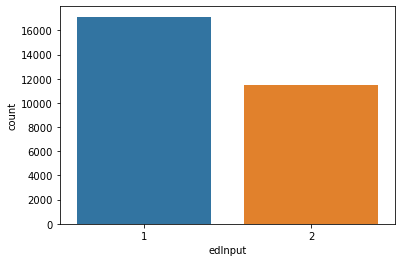

In [25]:
import seaborn as sns
sns.countplot(x=y, data=df)

In [26]:
X['text'] = df['text'].values.astype('unicode')

In [27]:
X.head(20)

,text
12252,UK Prime Minister Theresa May will face a vote...
14042,UK PM Theresa May wins confidence vote with 20...
16954,The probe of the inaugural fund partly arises ...
18004,The week Brexit hit the brick wall Commons w...
18396,Have watched these kinds of pictures looking f...
23827,The worlds most successful people start their ...
26068,This is Pearl Harbor The whole country and who...
27414,Jose Mourinho has been sacked by Manchester Un...
29792,Pursue your ideas no matter how obvious they s...
29959,You dont have to choose between being a leader...


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# stratify
X_train_temp, X_test_temp, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

vect = CountVectorizer().fit(X_train_temp['text'])
# bow
X_train = vect.transform(X_train_temp['text'])

In [29]:
print("X_train:\n{}".format(repr(X_train)))

X_train:
<20064x28868 sparse matrix of type '<class 'numpy.int64'>'
	with 310129 stored elements in Compressed Sparse Row format>


In [30]:
print(len(vect.vocabulary_))

print(list(vect.vocabulary_.items())[:10])

28868
[('while', 28335), ('american', 1876), ('outperformance', 15775), ('continues', 5587), ('to', 26634), ('defy', 6483), ('history', 10761), ('the', 26320), ('rest', 18386), ('of', 15435)]


In [31]:
feature_names = vect.get_feature_names()

print("Number of features: {}".format(len(feature_names)))

print("First 20 features:\n{}".format(feature_names[:20])) 

print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030])) 

print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 28868
First 20 features:
['0001', '007', '015', '02', '03', '04', '05', '06', '062', '067', '07', '075', '078', '08', '09', '091', '10', '100', '1000', '10000']
Features 20010 to 20030:
['scwpfw', 'scy49vb', 'scyc4ae', 'scyzdceq', 'sczgbhzjr', 'sczgdmeged', 'sczlomsehj', 'sczo', 'sd', 'sd1fber', 'sd5f1', 'sd6fpee', 'sd9', 'sd94', 'sd9eqozvs', 'sdatb3ktzj', 'sdavmqc', 'sdaw', 'sday', 'sdba']
Every 2000th feature:
['0001', 'anna', 'burnt', 'crucial', 'enterprises', 'grand', 'janet', 'memorize', 'panyaden', 'reform', 'scuz6ur', 'softest', 'stcoo2fioukhox', 'taiyakinyc', 'vranich']


In [32]:
#from sklearn.metrics import SCORERS
#sorted(SCORERS.keys())

In [33]:
# Baseline model
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
 # build a grid search using only 1% of the data as the training set

from sklearn.model_selection import StratifiedShuffleSplit

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.25, train_size=0.75, random_state=0)

scores = cross_val_score(LogisticRegression(class_weight='balanced'), X_train, y_train, cv=cv, scoring='f1_weighted') 

print("Mean cross-validation f1 weighted: {:.2f}".format(np.mean(scores)))

Mean cross-validation f1 weighted: 0.80


In [34]:
#from sklearn.metrics import SCORERS
#sorted(SCORERS.keys())

In [35]:
df.shape

(28663, 18)

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv, scoring='f1_weighted') 

grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_)) 

print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.80
Best parameters:  {'C': 1}


In [37]:
X_test = vect.transform(X_test_temp['text']) 
print(grid.score(X_test, y_test))

0.7991332313796199


In [38]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def print_confusion_matrix(y_test, y_pred):
    actual = y_test.tolist()
    results = confusion_matrix(actual, y_pred)
    print('Confusion matrix :')
    print(results)
    print('Accuracy score :', accuracy_score(actual, y_pred))
    print('Report : ')
    print(classification_report(actual, y_pred))

    f1 = f1_score(actual, y_pred, average='binary')
    print('F1 measure: %.3f ', f1)

In [39]:
y_pred = grid.predict(X_test)
print_confusion_matrix(y_test, y_pred)

Confusion matrix :
[[4321  812]
 [ 911 2555]]
Accuracy score : 0.799627863705082
Report : 
              precision    recall  f1-score   support

           1       0.83      0.84      0.83      5133
           2       0.76      0.74      0.75      3466

    accuracy                           0.80      8599
   macro avg       0.79      0.79      0.79      8599
weighted avg       0.80      0.80      0.80      8599

F1 measure: %.3f  0.8337674867342018


In [40]:
y_test.shape

(8599,)

In [41]:
y_pred.shape

(8599,)

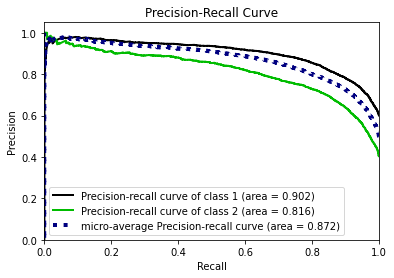

In [42]:
# try threshold value. naive bayes or SVC
import scikitplot as skplt
y_prob = grid.predict_proba(X_test)
skplt.metrics.plot_precision_recall_curve(y_test, y_prob)
plt.show()

In [43]:
# use tokens appearing in alteast 5 documents
vect = CountVectorizer(min_df=5).fit(X_train_temp['text'])

X_train = vect.transform(X_train_temp['text'])

print("X_train with min_df: {}".format(repr(X_train)))

X_train with min_df: <20064x6784 sparse matrix of type '<class 'numpy.int64'>'
	with 276884 stored elements in Compressed Sparse Row format>


In [44]:
feature_names = vect.get_feature_names()

print("num of features :{}".format(len(feature_names)))

print("First 50 features:\n{}".format(feature_names[:50]))

print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030])) 

print("Every 700th feature:\n{}".format(feature_names[::700]))

num of features :6784
First 50 features:
['10', '100', '1000', '10000', '100000', '101', '10year', '11', '110', '11000', '11th', '12', '120', '125', '129', '13', '130', '1300', '135', '139', '14', '15', '150', '1500', '16', '17', '17000', '18', '180', '1800', '185', '19', '1960s', '1970s', '1980s', '1984', '1989', '19yearold', '1mdb', '1st', '20', '200', '2000', '20000', '200000', '2007', '2008', '2009', '2010', '2011']
Features 20010 to 20030:
[]
Every 700th feature:
['10', 'battery', 'condemn', 'employment', 'happens', 'lebron', 'one', 'reducing', 'sovereign', 'turnover']


In [45]:
X_test_temp['text'] = X_test_temp['text'].values.astype('unicode')

In [46]:
X_train_temp.head()

,text
565759,While American outperformance continues to def...
652432,It comes down to creating an environment of sh...
252453,Walmart is officially the biggest retailer in ...
408277,In the 1960s the future of transportation rest...
547793,Israel to hold new elections with Netanyahus f...


In [47]:
# after cleanup
vect = CountVectorizer(min_df=5).fit(X_train_temp['text'])

X_train = vect.transform(X_train_temp['text'])

X_test = vect.transform(X_test_temp['text'])

In [48]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv)

grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.79


In [49]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS 

print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS))) 

print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop words: 318
Every 10th stopword:
['then', 'something', 'before', 'give', 'namely', 'becoming', 'back', 'were', 'have', 'off', 'always', 'call', 'whole', 'around', 'indeed', 'could', 'inc', 'side', 'several', 'each', 'co', 'please', 'serious', 'though', 'also', 'five', 'eight', 'three', 'thru', 'latterly', 'few', 'through']


In [50]:
vect = CountVectorizer(min_df=5, stop_words="english").fit(X_train_temp['text'])

X_train = vect.transform(X_train_temp['text'])

print("X_train with stop words:\n{}".format(repr(X_train)))

X_train with stop words:
<20064x6536 sparse matrix of type '<class 'numpy.int64'>'
	with 161573 stored elements in Compressed Sparse Row format>


In [51]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv) 

grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))

print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.80
Best parameters:  {'C': 0.1}


In [52]:
# eliminate frequently used words
vect = CountVectorizer(min_df=5, max_df=0.55).fit(X_train_temp['text'])

X_train = vect.transform(X_train_temp['text'])

print("X_train with max df:\n{}".format(repr(X_train)))

X_train with max df:
<20064x6784 sparse matrix of type '<class 'numpy.int64'>'
	with 276884 stored elements in Compressed Sparse Row format>


In [53]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv) 

grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))

print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.79
Best parameters:  {'C': 0.1}


In [54]:
# term-frequency, inverse document frequency. 
# The lower the IDF value of a word, the less unique it is to any particular document.
from sklearn.feature_extraction.text import TfidfVectorizer 

from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
                         LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=cv)
grid.fit(X_train_temp['text'], y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.79


In [55]:
grid.best_estimator_

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(min_df=5, norm=None)),
                ('logisticregression', LogisticRegression(C=0.01))])

In [56]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
print(type(vectorizer))
#transform the training dataset
X_train = vectorizer.transform(X_train_temp['text'])
#find max values for each of the features over the dataset
max_value = X_train.max(axis=0).toarray().ravel() 
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names()) 
print("Features with highest tfidf:\n{}".format(
feature_names[sorted_by_tfidf[:20]])) 
print("Features with lowest tfidf: \n{}".format(

feature_names[sorted_by_tfidf[-20:]]))

<class 'sklearn.feature_extraction.text.TfidfVectorizer'>
Features with highest tfidf:
['according' 'know' 'even' 'breaking' 'via' 'donald' 'set' 'three'
 'chinas' 'live' 'plans' 'home' 'thats' 'making' 'without' 'theresa'
 'industry' 'today' 'stocks' 'find']
Features with lowest tfidf: 
['reputation' 'juventus' 'macbook' 'joy' 'dust' 'dress' 'manchester'
 'capital' 'stores' 'good' 'fired' 'she' 'year' 'pakistan' 'best' 'vs'
 'wikileaks' 'idea' 'tweets' 'fiscal']


In [57]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())

param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100],
                  "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}
grid = GridSearchCV(pipe, param_grid, cv=cv)
grid.fit(X_train_temp['text'], y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_)) 

print("Best parameters:\n{}".format(grid.best_params_))

Best cross-validation score: 0.80
Best parameters:
{'logisticregression__C': 1, 'tfidfvectorizer__ngram_range': (1, 1)}


In [58]:
#!pip install -U pip setuptools wheel
#!pip install -U spacy
#!python -m spacy download en_core_web_sm

In [59]:
import re

import spacy


en_nlp = spacy.load('en_core_web_sm')
def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

# define a count vectorizer with the custom tokenizer
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

In [60]:
# transform text_train using CountVectorizer with lemmatization

X_train_lemma = lemma_vect.fit_transform(X_train_temp['text']) 

print("X_train_lemma.shape: {}".format(X_train_lemma.shape))

# standard CountVectorizer for reference

vect = CountVectorizer(min_df=5).fit(X_train_temp['text']) 

X_train = vect.transform(X_train_temp['text']) 

print("X_train.shape: {}".format(X_train.shape))

X_train_lemma.shape: (20064, 5509)
X_train.shape: (20064, 6784)


In [61]:
# transform text_train using CountVectorizer with lemmatization

X_train_lemma = lemma_vect.fit_transform(X_train_temp['text']) 

print("X_train_lemma.shape: {}".format(X_train_lemma.shape))

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv) 

grid.fit(X_train_lemma, y_train)

print("Best cross-validation score with lemma: {:.2f}".format(grid.best_score_))

print("Best parameters: ", grid.best_params_)

X_train_lemma.shape: (20064, 5509)
Best cross-validation score with lemma: 0.80
Best parameters:  {'C': 1}


In [62]:
X_test = lemma_vect.transform(X_test_temp['text']) 
y_pred = grid.predict(X_test)
print_confusion_matrix(y_test, y_pred)

Confusion matrix :
[[4311  822]
 [ 924 2542]]
Accuracy score : 0.7969531340853587
Report : 
              precision    recall  f1-score   support

           1       0.82      0.84      0.83      5133
           2       0.76      0.73      0.74      3466

    accuracy                           0.80      8599
   macro avg       0.79      0.79      0.79      8599
weighted avg       0.80      0.80      0.80      8599

F1 measure: %.3f  0.8315972222222222


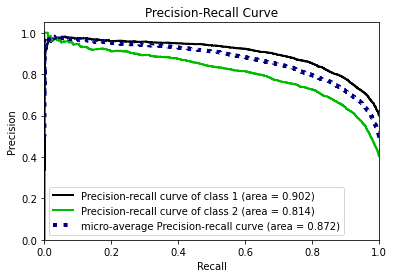

In [63]:
y_prob = grid.predict_proba(X_test)
skplt.metrics.plot_precision_recall_curve(y_test, y_prob)
plt.show()

In [64]:
# SVC Model
from sklearn.svm import LinearSVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(LinearSVC(), param_grid, cv=cv) 

grid.fit(X_train_lemma, y_train)

print("Best cross-validation score with SVC lemma: {:.2f}".format(grid.best_score_))

print("Best parameters SVC: ", grid.best_params_)

Best cross-validation score with SVC lemma: 0.80
Best parameters SVC:  {'C': 0.01}


In [65]:
X_test = lemma_vect.transform(X_test_temp['text']) 
y_pred = grid.predict(X_test)
print_confusion_matrix(y_test, y_pred)

Confusion matrix :
[[4397  736]
 [1026 2440]]
Accuracy score : 0.7950924526107687
Report : 
              precision    recall  f1-score   support

           1       0.81      0.86      0.83      5133
           2       0.77      0.70      0.73      3466

    accuracy                           0.80      8599
   macro avg       0.79      0.78      0.78      8599
weighted avg       0.79      0.80      0.79      8599

F1 measure: %.3f  0.8330807123910572


In [79]:
# Naive bayes model - best model performance
from sklearn.naive_bayes import MultinomialNB

param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

grid = GridSearchCV(MultinomialNB(), param_grid, cv=cv) 

grid.fit(X_train_lemma, y_train)

print("Best cross-validation score with NB lemma: {:.2f}".format(grid.best_score_))

print("Best parameters NB: ", grid.best_params_)

Best cross-validation score with NB lemma: 0.81
Best parameters NB:  {'alpha': 0.5}


In [80]:
X_test = lemma_vect.transform(X_test_temp['text']) 
y_pred = grid.predict(X_test)
print_confusion_matrix(y_test, y_pred)

Confusion matrix :
[[4417  716]
 [ 993 2473]]
Accuracy score : 0.8012559599953483
Report : 
              precision    recall  f1-score   support

           1       0.82      0.86      0.84      5133
           2       0.78      0.71      0.74      3466

    accuracy                           0.80      8599
   macro avg       0.80      0.79      0.79      8599
weighted avg       0.80      0.80      0.80      8599

F1 measure: %.3f  0.8379019254481647


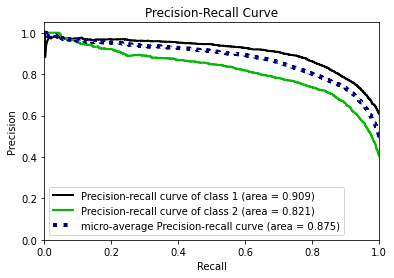

In [81]:
y_prob = grid.predict_proba(X_test)
skplt.metrics.plot_precision_recall_curve(y_test, y_prob)
plt.show()

In [114]:
# Naive bayes model - best model performance
from sklearn.naive_bayes import MultinomialNB

param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

grid = GridSearchCV(MultinomialNB(class_prior = [0.55, 0.45]), param_grid, cv=cv) 

grid.fit(X_train_lemma, y_train)

print("Best cross-validation score with NB lemma: {:.5f}".format(grid.best_score_))

print("Best parameters NB: ", grid.best_params_)

Best cross-validation score with NB lemma: 0.81136
Best parameters NB:  {'alpha': 0.5}


In [115]:
X_test = lemma_vect.transform(X_test_temp['text']) 
y_pred = grid.predict(X_test)
print_confusion_matrix(y_test, y_pred)

Confusion matrix :
[[4371  762]
 [ 924 2542]]
Accuracy score : 0.8039306896150715
Report : 
              precision    recall  f1-score   support

           1       0.83      0.85      0.84      5133
           2       0.77      0.73      0.75      3466

    accuracy                           0.80      8599
   macro avg       0.80      0.79      0.79      8599
weighted avg       0.80      0.80      0.80      8599

F1 measure: %.3f  0.8383199079401611


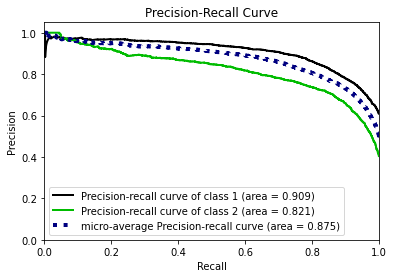

In [116]:
y_prob = grid.predict_proba(X_test)
skplt.metrics.plot_precision_recall_curve(y_test, y_prob)
plt.show()

In [120]:
# Naive bayes model - best model performance
from sklearn.naive_bayes import MultinomialNB

param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

grid = GridSearchCV(MultinomialNB(class_prior = [0.65, 0.35]), param_grid, cv=cv) 

grid.fit(X_train_lemma, y_train)

print("Best cross-validation score with NB lemma: {:.5f}".format(grid.best_score_))

print("Best parameters NB: ", grid.best_params_)

Best cross-validation score with NB lemma: 0.80941
Best parameters NB:  {'alpha': 0.5}


In [121]:
X_test = lemma_vect.transform(X_test_temp['text']) 
y_pred = grid.predict(X_test)
print_confusion_matrix(y_test, y_pred)

Confusion matrix :
[[4469  664]
 [1071 2395]]
Accuracy score : 0.7982323525991394
Report : 
              precision    recall  f1-score   support

           1       0.81      0.87      0.84      5133
           2       0.78      0.69      0.73      3466

    accuracy                           0.80      8599
   macro avg       0.79      0.78      0.79      8599
weighted avg       0.80      0.80      0.80      8599

F1 measure: %.3f  0.8374402698397827


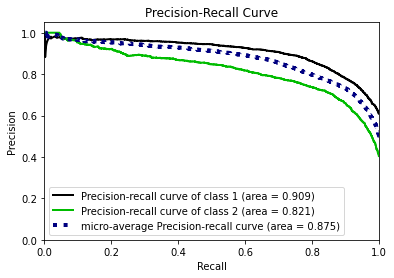

In [122]:
y_prob = grid.predict_proba(X_test)
skplt.metrics.plot_precision_recall_curve(y_test, y_prob)
plt.show()